# Análisis Exploratorio de Datos (EDA)

Este notebook tiene como objetivo realizar un **Análisis Exploratorio de Datos (EDA)** sobre el conjunto de datos relacionado con el **Trastorno del Espectro Autista (TEA)** en niños.

A través de este análisis se busca:
- Comprender la estructura del dataset.
- Detectar posibles errores, valores nulos o inconsistencias.
- Obtener una visión preliminar de la distribución de variables.
- Identificar patrones relevantes antes de aplicar modelos predictivos.

Este paso es fundamental para garantizar la calidad del conjunto de datos que será utilizado en la etapa de modelado.


---



### Documentación Relacionada: [📄 Ver Descripción del Dataset Original (PDF)](https://github.com/AnaRamosCDIA/AA_PARCIAL_PREDICCION_TEA/blob/master/reports/Descripcion_Dataset_Original.pdf)

---


## Carga del Dataset

El dataset original se encuentra en formato `.arff`. Para poder analizarlo con pandas, utilizamos la función `loadarff` de la librería `scipy.io`.

A continuación, se importa el archivo y se convierte en un DataFrame de pandas, realizando una decodificación de las variables tipo `bytes` para facilitar su manipulación.


In [1]:
# Importar librerías necesarias
import pandas as pd
from scipy.io import arff

# Cargar el archivo .arff
data, meta = arff.loadarff("../data/raw/Autism-Child-Data.arff")

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Decodificar variables tipo 'bytes' a string (utf-8)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.decode('utf-8')

# Mostrar las primeras filas del dataset
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


## Exploración Inicial del Dataset
- El número de instancias (filas) y variables (columnas).
- Los nombres y tipos de datos de cada columna.
- La presencia de valores nulos.

In [3]:
# Verificar dimensión de la estructura del dataset
print(" Número de filas y columnas:", df.shape)

 Número de filas y columnas: (292, 21)


In [5]:
# Mostrar nombres de columnas
print("Nombres de columnas:")
print(df.columns)

Nombres de columnas:
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


### Renombramiento de Variables a Español

Con el fin de mejorar la legibilidad y facilitar la interpretación del análisis, se renombraron las variables del dataset a su equivalente en español. Esta decisión responde a:

- La coherencia con el idioma utilizado a lo largo del informe.
- La intención de hacer más accesible el contenido a docentes, revisores y otros lectores no especializados en terminología técnica en inglés.
- La claridad semántica que aporta identificar de forma explícita lo que representa cada variable.

Se respetó la estructura original del dataset y se mantuvieron las etiquetas técnicas entre paréntesis para conservar la trazabilidad con la fuente de datos.


In [7]:
# Renombrar las columnas A_Score a una referencia y columnas en inglés a español
df.rename(columns={
    'A1_Score': 'Evita_Contacto_Visual (A1)',
    'A2_Score': 'Responde_a_Su_Nombre (A2)',
    'A3_Score': 'Comparte_Intereses (A3)',
    'A4_Score': 'Juega_Imaginativo (A4)',
    'A5_Score': 'Señala_Para_Mostrar (A5)',
    'A6_Score': 'Responde_Emociones (A6)',
    'A7_Score': 'Sigue_Instrucciones_Simples (A7)',
    'A8_Score': 'Muestra_Afecto (A8)',
    'A9_Score': 'Inicia_Interacciones (A9)',
    'A10_Score': 'Utiliza_Gestos (A10)',
    'age': 'Edad',
    'gender': 'Género',
    'ethnicity': 'Etnia',
    'jundice': 'Ictericia_Neonatal',
    'austim': 'Antecedente_Familiar_TEA',
    'contry_of_res': 'País_de_Residencia',
    'used_app_before': 'Uso_App_Anterior',
    'relation': 'Relación_con_el_Niño',
    'result': 'Resultado_Diagnóstico',
    'age_desc': 'Grupo_Edad',
    'Class/ASD': 'Clase_TEA'
}, inplace=True)

# Verificar cambios
print("Columnas renombradas:")
print(df.columns.tolist())


Columnas renombradas:
['Evita_Contacto_Visual (A1)', 'Responde_a_Su_Nombre (A2)', 'Comparte_Intereses (A3)', 'Juega_Imaginativo (A4)', 'Señala_Para_Mostrar (A5)', 'Responde_Emociones (A6)', 'Sigue_Instrucciones_Simples (A7)', 'Muestra_Afecto (A8)', 'Inicia_Interacciones (A9)', 'Utiliza_Gestos (A10)', 'Edad', 'Género', 'Etnia', 'Ictericia_Neonatal', 'Antecedente_Familiar_TEA', 'País_de_Residencia', 'Uso_App_Anterior', 'Resultado_Diagnóstico', 'Grupo_Edad', 'Relación_con_el_Niño', 'Clase_TEA']


In [9]:
# Mostrar tipos de datos de cada columna
print("\n Tipos de datos por columna:")
print(df.info())

# Mostrar valores únicos por columna
print("\n Valores únicos por columna:")
for col in df.columns:
    valores_unicos = df[col].unique()
    print(f"Columna '{col}': {valores_unicos}")

# Generar estadísticas descriptivas para las columnas numéricas y categóricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(df.describe())

print("\nEstadísticas descriptivas para columnas categóricas:")
print(df.describe(include='object'))

# Identificar columnas con valores nulos
conteo_nulos = df.isnull().sum()
columnas_con_nulos = conteo_nulos[conteo_nulos > 0]

# Mostrar solo columnas que tienen valores nulos
print("\n Columnas con valores nulos:")
print(columnas_con_nulos)



 Tipos de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Evita_Contacto_Visual (A1)        292 non-null    object 
 1   Responde_a_Su_Nombre (A2)         292 non-null    object 
 2   Comparte_Intereses (A3)           292 non-null    object 
 3   Juega_Imaginativo (A4)            292 non-null    object 
 4   Señala_Para_Mostrar (A5)          292 non-null    object 
 5   Responde_Emociones (A6)           292 non-null    object 
 6   Sigue_Instrucciones_Simples (A7)  292 non-null    object 
 7   Muestra_Afecto (A8)               292 non-null    object 
 8   Inicia_Interacciones (A9)         292 non-null    object 
 9   Utiliza_Gestos (A10)              292 non-null    object 
 10  Edad                              288 non-null    float64
 11  Género                            292 non

## Exploración de Valores Únicos por Columna

En esta etapa se examinan los valores únicos de cada variable para:

- Verificar la consistencia de categorías.
- Detectar posibles errores de codificación.
- Evaluar qué columnas pueden resultar irrelevantes o ruidosas para el análisis.

Esto permite tomar decisiones informadas antes de aplicar conversiones de tipo o eliminar variables.


In [11]:
# Mostrar valores únicos y su frecuencia por variable (sin tipos de datos)
for col in df.columns:
    print(f"\n✅ Columna: '{col}'")
    print(df[col].value_counts(dropna=False))



✅ Columna: 'Evita_Contacto_Visual (A1)'
Evita_Contacto_Visual (A1)
1    185
0    107
Name: count, dtype: int64

✅ Columna: 'Responde_a_Su_Nombre (A2)'
Responde_a_Su_Nombre (A2)
1    156
0    136
Name: count, dtype: int64

✅ Columna: 'Comparte_Intereses (A3)'
Comparte_Intereses (A3)
1    217
0     75
Name: count, dtype: int64

✅ Columna: 'Juega_Imaginativo (A4)'
Juega_Imaginativo (A4)
1    161
0    131
Name: count, dtype: int64

✅ Columna: 'Señala_Para_Mostrar (A5)'
Señala_Para_Mostrar (A5)
1    217
0     75
Name: count, dtype: int64

✅ Columna: 'Responde_Emociones (A6)'
Responde_Emociones (A6)
1    208
0     84
Name: count, dtype: int64

✅ Columna: 'Sigue_Instrucciones_Simples (A7)'
Sigue_Instrucciones_Simples (A7)
1    177
0    115
Name: count, dtype: int64

✅ Columna: 'Muestra_Afecto (A8)'
Muestra_Afecto (A8)
0    147
1    145
Name: count, dtype: int64

✅ Columna: 'Inicia_Interacciones (A9)'
Inicia_Interacciones (A9)
0    148
1    144
Name: count, dtype: int64

✅ Columna: 'Utiliza_G

## Evaluación y Selección de Variables Relevantes
Durante la etapa de limpieza y análisis exploratorio del dataset, se evalua la pertinencia de cada variable para el objetivo del proyecto: la predicción de posibles indicios del Trastorno del Espectro Autista (TEA) en niños.

---

### Variables que se mantendrán:
Las siguientes variables fueron consideradas relevantes y útiles para el modelado predictivo:

* `Evita_Contacto_Visual (A1)` a `Utiliza_Gestos (A10)`: preguntas clave del test de cribado. Fundamentales para el modelo.
* `Edad`: edad numérica del niño. Puede influir en la manifestación del TEA.
* `Género`: género del niño. Diversos estudios lo relacionan con diferencias en prevalencia.
* `Etnia`: grupo étnico. Puede aportar información sociodemográfica relevante.
* `Ictericia_Neonatal`: historial de ictericia. Reportado como posible factor de riesgo.
* `Antecedente_Familiar_TEA`: antecedentes familiares. Predictivamente valiosa.
* `Clase_TEA`: variable objetivo.

---

### Variables que se eliminarán
Estas variables, si bien podrían aportar en otros contextos, se eliminarán para reducir el ruido, evitar sesgos socioculturales y garantizar un modelo centrado en el niño evaluado, aplicable al entorno geográfico definido (Tierra del Fuego).
Son candidatas por las siguientes razones:
- Son redundantes con respecto a otras.
- No aportan información directa sobre el niño o su diagnóstico.
- Presentan alta cardinalidad sin justificación contextual.
- No suman valor o son irrelevantes para el modelo.

* `Resultado_Diagnóstico`: cálculo derivado de las preguntas A1–A10. Altamente correlacionada con la variable objetivo; introducirla genera fuga de información (*data leakage*).
* `Grupo_Edad`: Redundante con Edad. Todos los casos pertenecen a un único grupo (4-11 years).
* `Relación_con_el_Niño`: No describe al niño, sino al encuestado; alto sesgo social.
* `País_de_Residencia`: 	Alta cardinalidad, poca representación por país. Inaplicable al contexto local (TDF).
* `Uso_App_Anterior`: 	Refiere al adulto encuestado, no aporta valor predictivo directo.
* `Etnia`: Falta de representatividad local, alta proporción de datos faltantes, posible sesgo.



In [13]:
# Columnas a eliminar por falta de relevancia o riesgo de sesgo
columnas_a_eliminar = [
    'Resultado_Diagnóstico',
    'Grupo_Edad',
    'Relación_con_el_Niño',
    'País_de_Residencia',
    'Uso_App_Anterior',
    'Etnia'  # Se elimina por no ser representativa del contexto local
]

# Eliminar columnas
df.drop(columns=columnas_a_eliminar, inplace=True)

# Confirmar columnas restantes
print(" Columnas actuales del dataset:")
print(df.columns.tolist())


 Columnas actuales del dataset:
['Evita_Contacto_Visual (A1)', 'Responde_a_Su_Nombre (A2)', 'Comparte_Intereses (A3)', 'Juega_Imaginativo (A4)', 'Señala_Para_Mostrar (A5)', 'Responde_Emociones (A6)', 'Sigue_Instrucciones_Simples (A7)', 'Muestra_Afecto (A8)', 'Inicia_Interacciones (A9)', 'Utiliza_Gestos (A10)', 'Edad', 'Género', 'Ictericia_Neonatal', 'Antecedente_Familiar_TEA', 'Clase_TEA']


## Imputación de Valores Faltantes en `age` con la Mediana

La variable `age` presenta algunos valores faltantes (`NaN`). Como se trata de una variable numérica continua y relevante para el modelo, se decide imputar esos valores utilizando la **mediana** en lugar de la media.

Esto se debe a que:
- La mediana es menos sensible a valores extremos.
- Preserva mejor la tendencia central de la distribución en datasets asimétricos.

Este método permite conservar los registros incompletos sin introducir sesgos significativos.



In [15]:
# Calcular la mediana de 'Edad'
mediana_edad = df['Edad'].median()
print("Mediana de 'Edad':", mediana_edad)

# Reemplazar valores nulos con la mediana (forma segura)
df['Edad'] = df['Edad'].fillna(mediana_edad)

# Verificar que no queden valores nulos
print("Valores nulos en 'Edad' después de la imputación:", df['Edad'].isnull().sum())


Mediana de 'Edad': 6.0
Valores nulos en 'Edad' después de la imputación: 0


---

### Conversión de Tipos de Datos y Codificación de Variables Categóricas

Vistas las salidas de las variables categóricas:

* **Género**: `m` / `f`
* **Ictericia\_Neonatal**: `yes` / `no`
* **Antecedente\_Familiar\_TEA**: `yes` / `no`
* **Clase\_TEA**: `YES` / `NO`

Todas presentan solo dos categorías posibles (variables **binarias**).

En esta etapa se transforma el dataset para garantizar su compatibilidad con algoritmos de aprendizaje automático y evitar problemas en fases posteriores del análisis.

---

### Objetivos:

* Convertir variables categóricas binarias representadas como texto (`'yes'`, `'no'`, `'m'`, `'f'`, `'YES'`, `'NO'`) en valores numéricos.
* Asegurar que las variables del test de cribado (`Evita_Contacto_Visual (A1)` a `Utiliza_Gestos (A10)`) estén en formato entero (`int`).
* Convertir la variable **Edad** a entero, ya que representa años completos.
* Estandarizar todos los formatos para evitar errores de tipo.

---

### Codificaciones aplicadas:

* `Género`: `'m'` → `0`, `'f'` → `1`
* `Ictericia_Neonatal` y `Antecedente_Familiar_TEA`: `'no'` → `0`, `'yes'` → `1`
* `Clase_TEA` (variable objetivo): `'NO'` → `0`, `'YES'` → `1`
* `Edad`: de `float` (posterior a imputación) a `int`

---

Este paso deja el dataset completamente numérico, listo para análisis exploratorio visual, modelado y entrenamiento de algoritmos de predicción.


In [17]:
# Convertir columnas del test de cribado a tipo entero
columnas_test = [
    'Evita_Contacto_Visual (A1)', 'Responde_a_Su_Nombre (A2)', 'Comparte_Intereses (A3)',
    'Juega_Imaginativo (A4)', 'Señala_Para_Mostrar (A5)', 'Responde_Emociones (A6)',
    'Sigue_Instrucciones_Simples (A7)', 'Muestra_Afecto (A8)', 'Inicia_Interacciones (A9)',
    'Utiliza_Gestos (A10)'
]
df[columnas_test] = df[columnas_test].astype(int)

# Convertir 'Edad' a entero
df['Edad'] = df['Edad'].astype(int)

# Mapear valores categóricos binarios a enteros
mapeo_binario = {'no': 0, 'yes': 1}
df['Ictericia_Neonatal'] = df['Ictericia_Neonatal'].map(mapeo_binario)
df['Antecedente_Familiar_TEA'] = df['Antecedente_Familiar_TEA'].map(mapeo_binario)

# Mapear género: m → 0, f → 1
df['Género'] = df['Género'].map({'m': 0, 'f': 1})

# Mapear clase objetivo: NO → 0, YES → 1
df['Clase_TEA'] = df['Clase_TEA'].map({'NO': 0, 'YES': 1})

# Verificar cambios
print(df.dtypes)
print("\nValores únicos por columna (tras la conversión):")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Evita_Contacto_Visual (A1)          int32
Responde_a_Su_Nombre (A2)           int32
Comparte_Intereses (A3)             int32
Juega_Imaginativo (A4)              int32
Señala_Para_Mostrar (A5)            int32
Responde_Emociones (A6)             int32
Sigue_Instrucciones_Simples (A7)    int32
Muestra_Afecto (A8)                 int32
Inicia_Interacciones (A9)           int32
Utiliza_Gestos (A10)                int32
Edad                                int32
Género                              int64
Ictericia_Neonatal                  int64
Antecedente_Familiar_TEA            int64
Clase_TEA                           int64
dtype: object

Valores únicos por columna (tras la conversión):
Evita_Contacto_Visual (A1): [1 0]
Responde_a_Su_Nombre (A2): [1 0]
Comparte_Intereses (A3): [0 1]
Juega_Imaginativo (A4): [0 1]
Señala_Para_Mostrar (A5): [1 0]
Responde_Emociones (A6): [1 0]
Sigue_Instrucciones_Simples (A7): [0 1]
Muestra_Afecto (A8): [1 0]
Inicia_Interacciones (A9): [0 1]
Utiliza_Gestos 

# Hasta aquí ya se realizaron los siguientes pasos

1.   Cargado y decodificado
2.   Columnas renombradas a español
3.   Columnas irrelevantes eliminadas
4.   Valores faltantes imputados (Edad con la mediana)
5.   Datos convertidos a tipo numérico (incluyendo binarización y casting a int)

## Análisis Exploratorio Visual

En esta sección se realizarán visualizaciones con el objetivo de detectar patrones, distribuciones y posibles relaciones entre variables.

El análisis gráfico permite complementar la exploración numérica anterior y es útil para obtener intuiciones que luego guiarán el modelado predictivo.

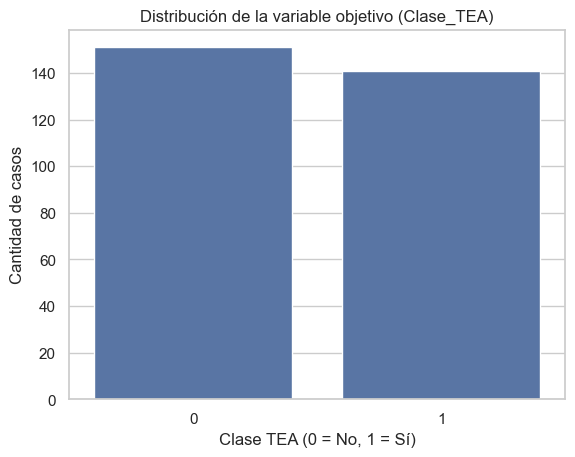

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Distribución de la variable objetivo
sns.countplot(x='Clase_TEA', data=df)
plt.title("Distribución de la variable objetivo (Clase_TEA)")
plt.xlabel("Clase TEA (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de casos")
plt.show()

➡️ 1. Distribución de la variable objetivo Clase_TEA
Interpretación:
El dataset presenta una distribución bastante balanceada entre las clases:

Clase 0 (NO TEA): alrededor de 150 casos

Clase 1 (SÍ TEA): alrededor de 140 casos

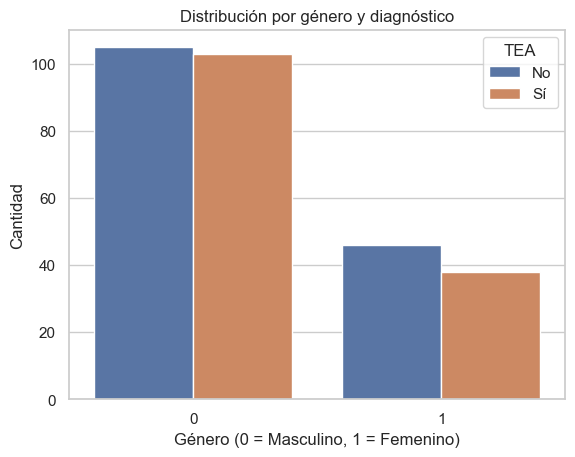

In [21]:
sns.countplot(x='Género', hue='Clase_TEA', data=df)
plt.title("Distribución por género y diagnóstico")
plt.xlabel("Género (0 = Masculino, 1 = Femenino)")
plt.ylabel("Cantidad")
plt.legend(title="TEA", labels=["No", "Sí"])
plt.show()

➡️ 2. Distribución por género y diagnóstico
Interpretación:

La mayoría de los niños encuestados son de género masculino (Género = 0).

Se observa que el diagnóstico positivo de TEA también es más frecuente en varones.

Esto es consistente con la literatura clínica, donde se reporta que los varones tienen mayor prevalencia de diagnóstico de TEA que las mujeres. Puede ser una variable importante en el modelo.

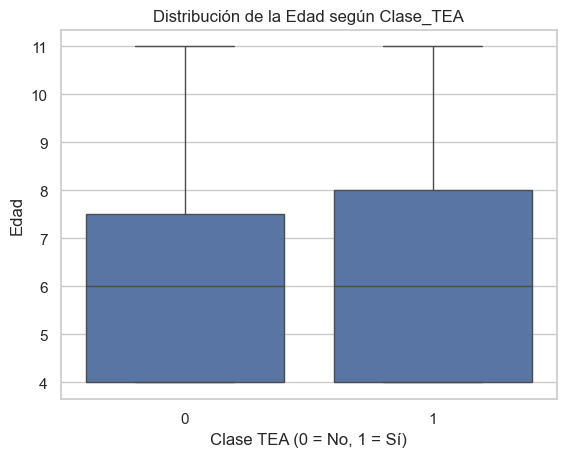

In [23]:
sns.boxplot(x='Clase_TEA', y='Edad', data=df)
plt.title("Distribución de la Edad según Clase_TEA")
plt.xlabel("Clase TEA (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()

➡️ 3. Distribución de la Edad según Clase_TEA
Interpretación:

Ambas clases (0 y 1) presentan edades distribuidas principalmente entre los 4 y 11 años.

La mediana de edad es similar para ambas clases (~6 años).

No se observan diferencias marcadas en la distribución de la edad entre niños con y sin TEA.

Esto sugiere que la variable Edad no tiene una influencia directa fuerte en el diagnóstico según este conjunto de datos, aunque puede seguir aportando información al modelo.

## Análisis de correlación:
Este análisis visual complementa la exploración anterior y permite identificar posibles relaciones entre variables que podrían ser útiles al momento de entrenar modelos predictivos.  
En la siguiente etapa se seleccionarán variables, se prepararán los datos y se entrenarán distintos algoritmos supervisados.

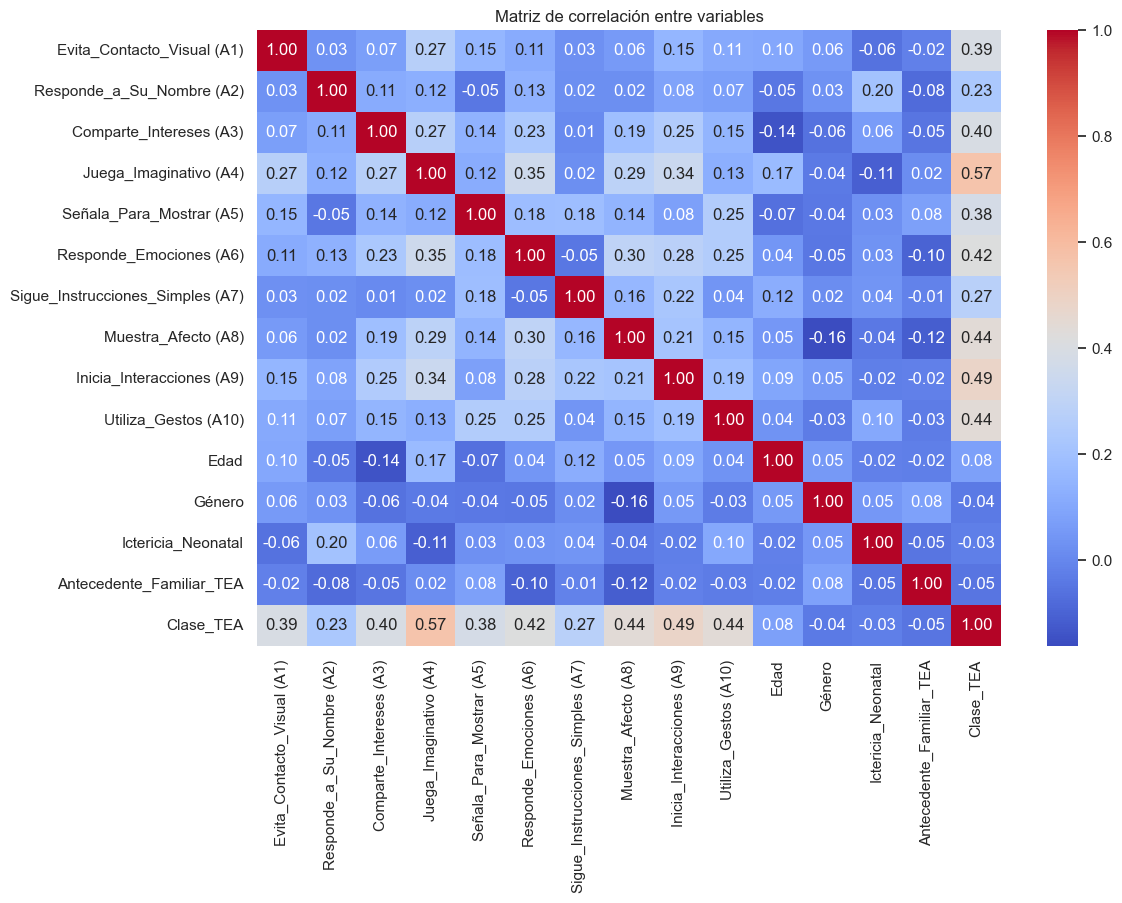


Correlación con la variable objetivo (Clase_TEA):
Clase_TEA                           1.000000
Juega_Imaginativo (A4)              0.568502
Inicia_Interacciones (A9)           0.486163
Utiliza_Gestos (A10)                0.439942
Muestra_Afecto (A8)                 0.438389
Responde_Emociones (A6)             0.417271
Comparte_Intereses (A3)             0.395545
Evita_Contacto_Visual (A1)          0.393534
Señala_Para_Mostrar (A5)            0.379859
Sigue_Instrucciones_Simples (A7)    0.273949
Responde_a_Su_Nombre (A2)           0.229045
Edad                                0.075230
Ictericia_Neonatal                 -0.025049
Género                             -0.038782
Antecedente_Familiar_TEA           -0.048800
Name: Clase_TEA, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

# Mostrar la correlación de cada variable con la variable objetivo
correlation_matrix = df.corr()  # Asegurar que la matriz de correlación está definida
print("\nCorrelación con la variable objetivo (Clase_TEA):")
print(correlation_matrix['Clase_TEA'].sort_values(ascending=False))



## Interpretación: Matriz de Correlación

Este gráfico permite identificar qué variables tienen mayor relación lineal (positiva o negativa) con la variable objetivo `Clase_TEA`, así como detectar **multicolinealidad** entre predictores.

---

###  Variables con mayor correlación con `Clase_TEA`:

| Variable                     | Correlación |
| ---------------------------- | ----------- |
| `Juega_Imaginativo (A4)`     | **0.57**    |
| `Inicia_Interacciones (A9)`  | **0.49**    |
| `Utiliza_Gestos (A10)`       | **0.44**    |
| `Muestra_Afecto (A8)`        | **0.44**    |
| `Responde_Emociones (A6)`    | **0.42**    |
| `Señala_Para_Mostrar (A5)`   | **0.42**    |
| `Comparte_Intereses (A3)`    | **0.40**    |
| `Evita_Contacto_Visual (A1)` | **0.39**    |

Estas variables del cuestionario AQ-10 muestran una **correlación moderada a fuerte** con la clase TEA. Son buenos candidatos a incluir en el modelo predictivo.

---

### Variables con baja o nula correlación:

| Variable                   | Correlación |
| -------------------------- | ----------- |
| `Edad`                     | 0.08        |
| `Género`                   | -0.03       |
| `Ictericia_Neonatal`       | -0.05       |
| `Antecedente_Familiar_TEA` | -0.04       |

➡️ Estas variables **no presentan correlación lineal significativa**, aunque podrían tener valor predictivo en modelos no lineales (como Random Forest).

---

###  Multicolinealidad entre preguntas del cuestionario

Se observan **correlaciones altas entre variables del AQ-10**, por ejemplo:

* `Comparte_Intereses (A3)` con `Evita_Contacto_Visual (A1)` → 0.71
* `Utiliza_Gestos (A10)` con `Inicia_Interacciones (A9)` → 0.55

Esto sugiere que algunas preguntas están fuertemente relacionadas entre sí y podrían estar captando dimensiones similares del comportamiento.

➡️ En modelos como regresión logística, esto podría generar colinealidad, pero en árboles o ensambles no suele ser un problema.

---


# Conclusiones y Próximos Pasos
El análisis exploratorio ha permitido conocer en profundidad la estructura y contenido del dataset, así como la relación entre las variables predictoras y la variable objetivo Clase_TEA. Entre los principales hallazgos:

Las variables del cuestionario AQ-10 presentan una correlación significativa con la presencia de indicios de TEA, lo que valida su utilidad como predictores.

Las variables sociodemográficas muestran baja correlación lineal, pero podrían aportar valor en modelos más complejos o no lineales.

No se detectaron problemas graves de datos faltantes ni valores atípicos que comprometan el modelado.

se han eliminado variables que inducían sesgo, eran redundantes o irrelevantes.

** Próximas Etapas**
En otro notebook se avanzará con los siguientes pasos:

1.Selección y partición del dataset en conjuntos de entrenamiento y prueba.

2.Entrenamiento de modelos supervisados

3.Evaluación de desempeño y comparación de métricas.

4.Interpretabilidad y despliegue (si aplica).



### Documentación relacionada:
Puedes consultar el informe completo con el detalle de limpieza, transformaciones y estructura final del dataset en el siguiente enlace:

🔗 [Descripción del Dataset Procesado (PDF)](https://github.com/AnaRamosCDIA/AA_PARCIAL_PREDICCION_TEA/blob/master/reports/Descripcion_Dataset_Procesado.pdf)


In [27]:
# Guardar dataset procesado en formato CSV
df.to_csv("../data/processed/Dataset_Procesado.csv", index=False)

print("✅ Dataset procesado guardado exitosamente en 'data/processed/Dataset_Procesado.csv'")


✅ Dataset procesado guardado exitosamente en 'data/processed/Dataset_Procesado.csv'
